# EDA AND VISUALIZATION ON H-1B VISA DataSet

We are going to perform exploratory data analysis and visualization on H-1B dataset obtained through https://www.kaggle.com/jmpark746/h1b-visas 

We would like to find some underlying trends in the data and see if we can deduce anything conclusive from the data over the years.
The data is available for years 2016, 2017 and 2018

In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv('h1b16.csv', encoding='utf-8')
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [3]:
print("Shape: ",df.shape)
print("Columns: ",df.columns)

Shape:  (3002458, 11)
Columns:  Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')


In [4]:
df['CASE_STATUS'].unique().tolist()

['CERTIFIED-WITHDRAWN',
 'WITHDRAWN',
 'CERTIFIED',
 'DENIED',
 'REJECTED',
 'INVALIDATED',
 'PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED',
 nan]

#### Let's take a look at all the entries that were Certified first:

In [5]:
df_cert = df[df['CASE_STATUS']=='CERTIFIED']
df_cert.shape

(2615623, 11)

In [6]:
df.describe()

,Unnamed: 0,PREVAILING_WAGE,YEAR,lon,lat
count,3.002458e+06,3.002373e+06,3.002445e+06,2.895216e+06,2.895216e+06
mean,1.501230e+06,1.469984e+05,2.013855e+03,-9.213441e+01,3.816054e+01
std,8.667351e+05,5.287609e+06,1.680612e+00,1.965591e+01,4.672835e+00
min,1.000000e+00,0.000000e+00,2.011000e+03,-1.578583e+02,1.343719e+01
25%,7.506152e+05,5.437100e+04,2.012000e+03,-1.119261e+02,3.416536e+01
50%,1.501230e+06,6.502100e+04,2.014000e+03,-8.615862e+01,3.910312e+01
75%,2.251844e+06,8.143200e+04,2.015000e+03,-7.551381e+01,4.088374e+01
max,3.002458e+06,6.997607e+09,2.016000e+03,1.457298e+02,6.483778e+01


### Let's visualize the Case Status values:

In [7]:
df['CASE_STATUS'].value_counts()

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

Lets plot these numbers as a bargraph

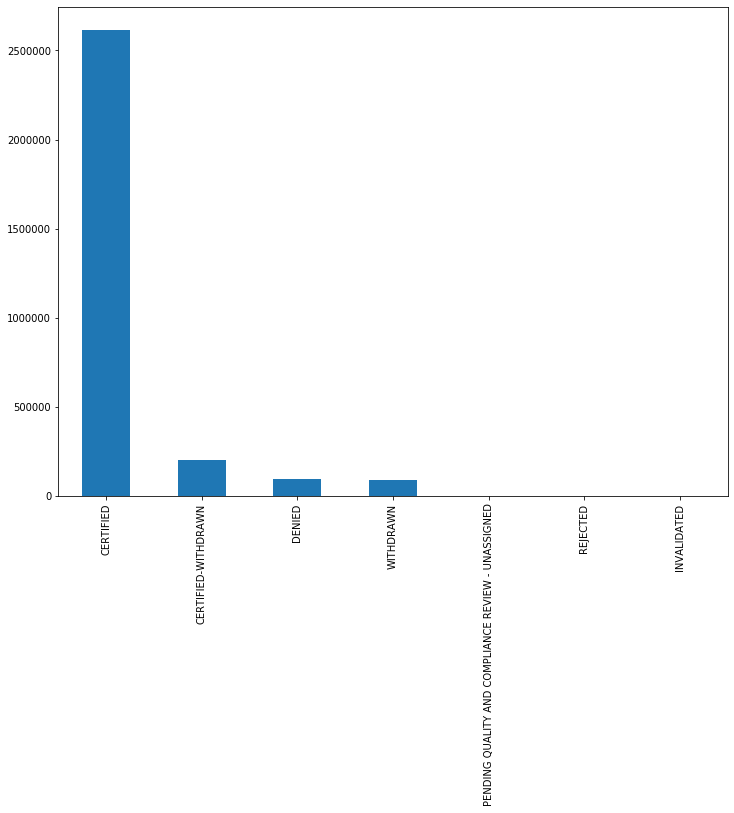

In [8]:
df.dropna()
df['CASE_STATUS'].value_counts().plot.bar(figsize=(12,9))

### Lets look at the employers

Are there any employers that are more likely to sponsor H1B visa?

In [9]:
df['EMPLOYER_NAME'].value_counts()

INFOSYS LIMITED                                    130592
TATA CONSULTANCY SERVICES LIMITED                   64726
WIPRO LIMITED                                       48117
DELOITTE CONSULTING LLP                             36742
IBM INDIA PRIVATE LIMITED                           34219
                                                    ...  
AA GLOBAL RESOURCES TRADING INC                         1
STEVEN E. NORTH, PC                                     1
ECONOMIC DEVELOPMENT CORPORATION OF KANSAS CITY         1
ARIZONABUYERNETWORK COM LLC                             1
ENGENNANO TECHNOLOGY, INC.                              1
Name: EMPLOYER_NAME, Length: 236013, dtype: int64

In [10]:
employers = df['EMPLOYER_NAME'].unique().tolist()
len(employers)

236014

There are 236,014 unique employers that are willing to sponsor H1B visa. Let's look at the top 25:

In [11]:
lst = df['EMPLOYER_NAME'].value_counts()
print(lst[:25])

INFOSYS LIMITED                                    130592
TATA CONSULTANCY SERVICES LIMITED                   64726
WIPRO LIMITED                                       48117
DELOITTE CONSULTING LLP                             36742
IBM INDIA PRIVATE LIMITED                           34219
ACCENTURE LLP                                       33447
MICROSOFT CORPORATION                               25576
HCL AMERICA, INC.                                   22678
ERNST & YOUNG U.S. LLP                              18232
COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION     17528
LARSEN & TOUBRO INFOTECH LIMITED                    17457
CAPGEMINI AMERICA INC                               16725
GOOGLE INC.                                         16473
IBM CORPORATION                                     13276
IGATE TECHNOLOGIES INC.                             12564
INTEL CORPORATION                                   11415
TECH MAHINDRA (AMERICAS),INC.                       10732
DELOITTE & TOU

### Lets take a look at the jobs that provide a H1B Visa

In [12]:
job_title_list = df['JOB_TITLE'].value_counts()
job_title_list[:50]

PROGRAMMER ANALYST                  249038
SOFTWARE ENGINEER                   121307
COMPUTER PROGRAMMER                  70570
SYSTEMS ANALYST                      61965
SOFTWARE DEVELOPER                   42907
BUSINESS ANALYST                     39681
COMPUTER SYSTEMS ANALYST             35086
TECHNOLOGY LEAD - US                 28350
SENIOR SOFTWARE ENGINEER             27133
TECHNOLOGY ANALYST - US              26055
ASSISTANT PROFESSOR                  25265
SENIOR CONSULTANT                    24904
CONSULTANT                           23081
PHYSICAL THERAPIST                   20207
PROJECT MANAGER                      20172
DATABASE ADMINISTRATOR               16665
ACCOUNTANT                           14048
COMPUTER PROGRAMMER ANALYST          13634
RESEARCH ASSOCIATE                   13623
DEVELOPER                            12909
ASSOCIATE                            12502
ANALYST                              11751
LEAD ENGINEER                        11157
COMPUTER SY

In [13]:
other_jobs = (job_title_list[50:]).sum()
other_jobs

1871029

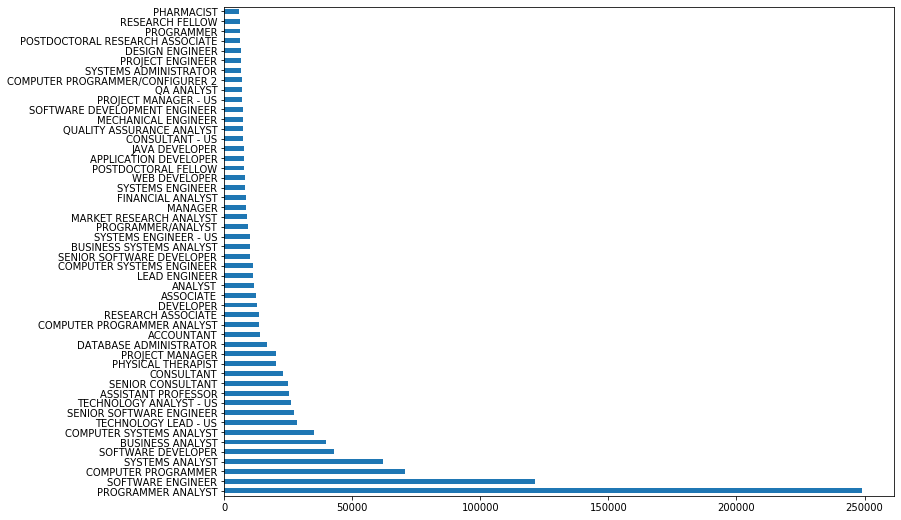

In [23]:
job_title_list[:50].plot.barh(rot=0, figsize=(12,9))

In [15]:
s = job_title_list[:50].append(pd.Series(str(other_jobs)))


### Lets analyze the wages of these roles

In [20]:
for i in job_title_list[0:50].index:
    sub = df[df['JOB_TITLE']==i]
    avg_sal = sub['PREVAILING_WAGE'].mean()
    print("Mean Salary "+str(i)+" : $"+str(avg_sal))

Mean Salary PROGRAMMER ANALYST : $146495.12855177588
Mean Salary SOFTWARE ENGINEER : $152094.69667714078
Mean Salary COMPUTER PROGRAMMER : $137711.9931182256
Mean Salary SYSTEMS ANALYST : $113919.51064472862
Mean Salary SOFTWARE DEVELOPER : $195561.8875147996
Mean Salary BUSINESS ANALYST : $178216.55877825554
Mean Salary COMPUTER SYSTEMS ANALYST : $143927.19898988042
Mean Salary TECHNOLOGY LEAD - US : $89446.56942504519
Mean Salary SENIOR SOFTWARE ENGINEER : $147439.11782036323
Mean Salary TECHNOLOGY ANALYST - US : $81342.67827288313
Mean Salary ASSISTANT PROFESSOR : $139882.002502276
Mean Salary SENIOR CONSULTANT : $113217.8077537745
Mean Salary CONSULTANT : $99863.52926863078
Mean Salary PHYSICAL THERAPIST : $141002.8679120044
Mean Salary PROJECT MANAGER : $174166.28859798674
Mean Salary DATABASE ADMINISTRATOR : $108743.63720132009
Mean Salary ACCOUNTANT : $132309.14608058363
Mean Salary COMPUTER PROGRAMMER ANALYST : $123239.7544839726
Mean Salary RESEARCH ASSOCIATE : $166288.0288541

# Now lets read in the file for 2017 and 2018 data

In [33]:
df_17= pd.read_csv('h1b17.csv', encoding='utf-8')
df_17.head(2)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (15,16,17,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,0,I-200-16055-173457,CERTIFIED-WITHDRAWN,2016-02-24,2016-10-01,H-1B,2016-08-10,2019-08-10,DISCOVER PRODUCTS INC.,NaN,...,N,N,NaN,Y,NaN,RIVERWOODS,LAKE,IL,60015,2016-03-01
1,1,I-200-16064-557834,CERTIFIED-WITHDRAWN,2016-03-04,2016-10-01,H-1B,2016-08-16,2019-08-16,DFS SERVICES LLC,NaN,...,N,N,NaN,Y,NaN,RIVERWOODS,LAKE,IL,60015,2016-03-08


In [29]:
df_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624650 entries, 0 to 624649
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   624650 non-null  int64  
 1   CASE_NUMBER                  624650 non-null  object 
 2   CASE_STATUS                  624650 non-null  object 
 3   CASE_SUBMITTED               624650 non-null  object 
 4   DECISION_DATE                624650 non-null  object 
 5   VISA_CLASS                   624650 non-null  object 
 6   EMPLOYMENT_START_DATE        624621 non-null  object 
 7   EMPLOYMENT_END_DATE          624620 non-null  object 
 8   EMPLOYER_NAME                624594 non-null  object 
 9   EMPLOYER_BUSINESS_DBA        43270 non-null   object 
 10  EMPLOYER_ADDRESS             624643 non-null  object 
 11  EMPLOYER_CITY                624635 non-null  object 
 12  EMPLOYER_STATE               624632 non-null  object 
 13 

In [31]:
df_17.shape

(624650, 53)

In [32]:
df_18 = pd.read_csv('h1b18.csv', encoding='utf-8')
df_18.head(2)

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_CITY,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,JOB_TITLE,SOC_CODE,SOC_NAME,FULL_TIME_POSITION,PREVAILING_WAGE,PW_UNIT_OF_PAY,WAGE_RATE_OF_PAY_FROM,WAGE_RATE_OF_PAY_TO,WAGE_UNIT_OF_PAY
0,I-200-18026-338377,CERTIFIED,1/29/18,2/2/18,H-1B,7/28/18,7/27/21,MICROSOFT CORPORATION,REDMOND,WA,98052,SOFTWARE ENGINEER,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",Y,"112,549.00",Year,"143,915.00",0.00,Year
1,I-200-17296-353451,CERTIFIED,10/23/17,10/27/17,H-1B,11/6/17,11/6/20,ERNST & YOUNG U.S. LLP,SECAUCUS,NJ,07094,TAX SENIOR,13-2011,ACCOUNTANTS AND AUDITORS,Y,"79,976.00",Year,"100,000.00",0.00,Year


In [25]:
df_18.shape

(654360, 20)

In [30]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654360 entries, 0 to 654359
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   CASE_NUMBER            654360 non-null  object
 1   CASE_STATUS            654360 non-null  object
 2   CASE_SUBMITTED         654359 non-null  object
 3   DECISION_DATE          654360 non-null  object
 4   VISA_CLASS             654360 non-null  object
 5   EMPLOYMENT_START_DATE  654353 non-null  object
 6   EMPLOYMENT_END_DATE    654349 non-null  object
 7   EMPLOYER_NAME          654341 non-null  object
 8   EMPLOYER_CITY          654349 non-null  object
 9   EMPLOYER_STATE         654287 non-null  object
 10  EMPLOYER_POSTAL_CODE   654342 non-null  object
 11  JOB_TITLE              654355 non-null  object
 12  SOC_CODE               654349 non-null  object
 13  SOC_NAME               654349 non-null  object
 14  FULL_TIME_POSITION     654354 non-null  object
 15  

Lots of Interesting things to note here. The data for 2017 and 2018 has a lot of attributes compared to the data for 2016.
The number of examples in both 2017 and 2018 is almost double of 2016s

In [35]:
top_jobs_2017 = (df_17['JOB_TITLE'].value_counts())[:50]
top_jobs_2017

PROGRAMMER ANALYST                        47151
SOFTWARE ENGINEER                         27950
SOFTWARE DEVELOPER                        16107
SYSTEMS ANALYST                           10798
BUSINESS ANALYST                           7410
COMPUTER PROGRAMMER                        7303
SENIOR SOFTWARE ENGINEER                   6983
COMPUTER SYSTEMS ANALYST                   6555
DEVELOPER                                  5835
ASSISTANT PROFESSOR                        4957
PROJECT MANAGER                            4262
CONSULTANT                                 3816
DEVELOPER USER INTERFACE                   3717
ASSOCIATE                                  3354
ANALYST                                    3155
SENIOR CONSULTANT                          3111
DATABASE ADMINISTRATOR                     3080
TECHNOLOGY LEAD - US                       2812
PHYSICAL THERAPIST                         2715
SENIOR SOFTWARE DEVELOPER                  2600
APPLICATION DEVELOPER                   

In [36]:
top_jobs_2018 = (df_18['JOB_TITLE'].value_counts())[:50]
top_jobs_2018

SOFTWARE DEVELOPER                     34907
SOFTWARE ENGINEER                      31943
PROGRAMMER ANALYST                     14109
SENIOR SOFTWARE ENGINEER                8430
SENIOR SYSTEMS ANALYST JC60             7041
DEVELOPER                               6244
SYSTEMS ANALYST                         6131
CONSULTANT                              6004
ASSISTANT PROFESSOR                     5302
BUSINESS ANALYST                        5145
SENIOR CONSULTANT                       4925
ANALYST                                 4821
PROJECT MANAGER                         3904
JAVA DEVELOPER                          3578
SENIOR SOFTWARE DEVELOPER               3516
ASSOCIATE                               3501
COMPUTER SYSTEMS ANALYST                3337
DATABASE ADMINISTRATOR                  2980
ENGINEER                                2927
COMPUTER PROGRAMMER                     2926
APPLICATION DEVELOPER                   2872
PHYSICAL THERAPIST                      2642
DEVELOPER 

## lets analyze the top 10 results from 2018

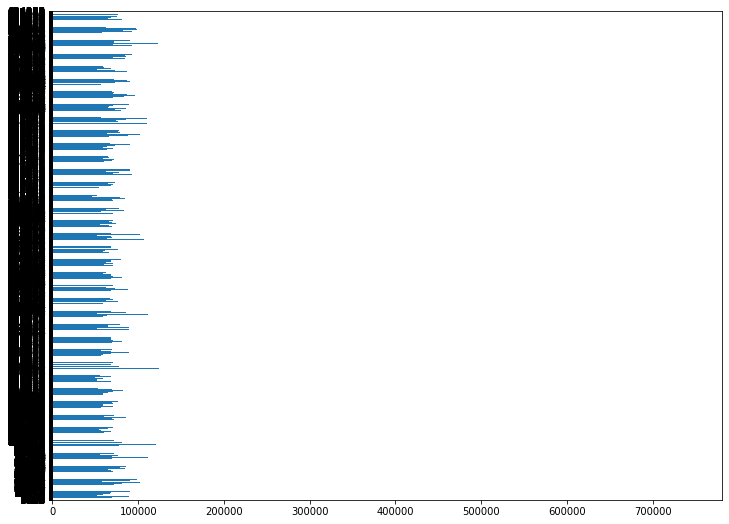

In [46]:
temp_df = df_17[df_17['JOB_TITLE']=='SOFTWARE DEVELOPER']
temp_df['PREVAILING_WAGE'].plot.barh(rot=0, figsize=(12,9))

As we can see, we should not plot a continuous value like wage as a bar plot. A good approach to put the bar plot would be 
to use the Binning technique.

In [47]:
bins= [0.00,25000.00,50000.00,100000.00,200000.00]
plt.hist(temp_df['PREVAILING_WAGE'], bins=bins, edgecolor="k")
plt.xticks(bins)

plt.show()

AttributeError: module 'matplotlib' has no attribute 'hist'